In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('/content/619XKz-jFAL._AC_SX425_.jpg')

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(425, 425, 3)

Display Image

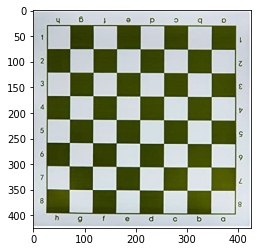

In [5]:
plt.imshow(image)

By default, OpenCV loads the images in the order BGR, instead of more conventional RGB. 

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

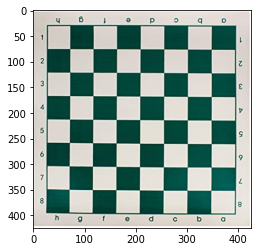

In [7]:
plt.imshow(image_rgb)

In [8]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

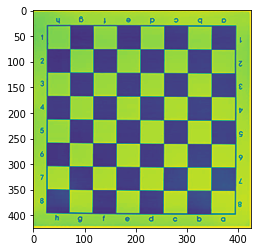

In [11]:
plt.imshow(image_gray)

In [13]:
image_gray.shape

(425, 425)

## Drawing Shapes 

In [14]:
canvas = np.full((300, 300, 3), fill_value=255, dtype = "uint8")

In [15]:
_=cv2.line(img=canvas, pt1=(0, 50), pt2=(300, 300), color=(0, 0, 255), thickness=5, lineType=cv2.LINE_AA)

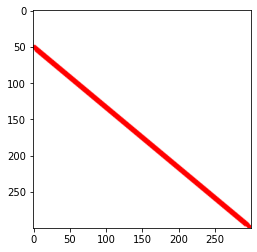

In [16]:
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

In [17]:

_=cv2.rectangle(img=canvas, pt1=(0, 200), pt2=(100, 300), color=(0, 255, 0), thickness=5, lineType=cv2.LINE_AA)

In [18]:
_=cv2.rectangle(img=canvas, pt1=(200, 0), pt2=(300, 100), color=(0, 255, 0), thickness=-1, lineType=cv2.LINE_AA)

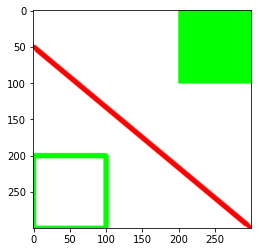

In [19]:
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

In [20]:
_=cv2.circle(img=canvas, center=(150, 150), radius=50, color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)

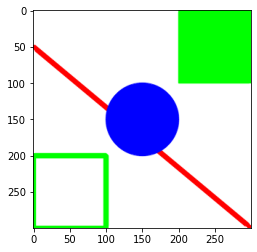

In [21]:

plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

## Resize

In [22]:
image_resized = cv2.resize(image, (200, 200))

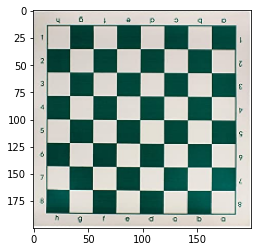

In [23]:
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))

# Blur 

## Avg Blur

In [24]:
image_avg_blur = cv2.blur(image, (51, 51))

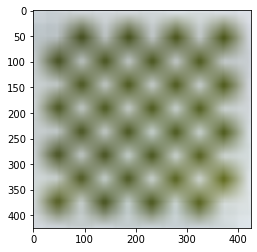

In [26]:
plt.imshow((image_avg_blur))

## Gaussian Blur

In [27]:
image_gauss_blur = cv2.GaussianBlur(image, (51, 51), 5)

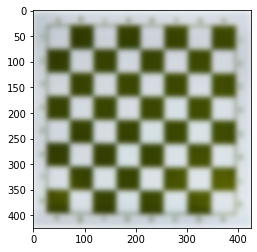

In [28]:

plt.imshow((image_gauss_blur))

# Canny Edge Detection

In [29]:
image_gray_smooth = cv2.GaussianBlur(image_gray, (3, 3), 0)

In [30]:
canny = cv2.Canny(image_gray_smooth, threshold1=80, threshold2=80)

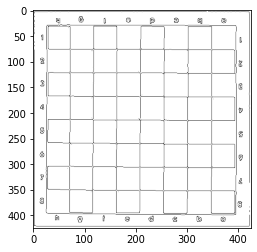

In [31]:
  plt.imshow(canny, cmap='Greys')

In [32]:
image = cv2.imread('/content/NINTCHDBPICT000455714025.jpg')

In [33]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [34]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

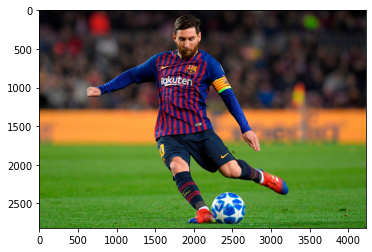

In [35]:
plt.imshow(image_rgb)

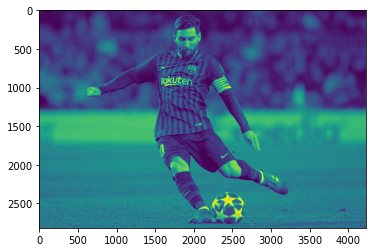

In [36]:
plt.imshow(image_gray)

In [37]:
image_gray_smooth = cv2.GaussianBlur(image_gray, (3, 3), 0)

In [38]:
canny = cv2.Canny(image_gray_smooth, threshold1=80, threshold2=80)

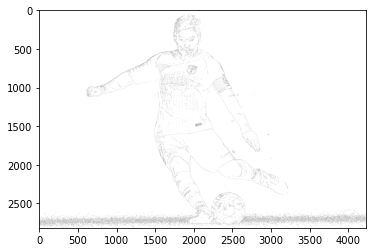

In [39]:
plt.imshow(canny, cmap='Greys')

## Morphology

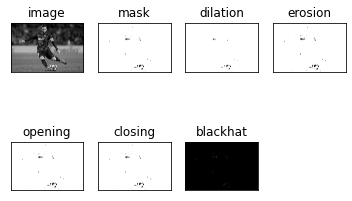

In [43]:
img=cv2.imread("/content/NINTCHDBPICT000455714025.jpg",0)
_,mask=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
#increasing the matrix size give us better results 
kernal=np.ones((2,2),np.uint8)

dilation=cv2.dilate(mask,kernal,iterations=4)
erosion=cv2.erode(mask,kernal,iterations=1)
opening=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernal)#erosion followed by dilation
closing=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernal)
bh=cv2.morphologyEx(mask,cv2.MORPH_BLACKHAT,kernal)
titles=['image','mask','dilation','erosion','opening','closing','blackhat']
images=[img,mask,dilation,erosion,opening,closing,bh]
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Filtering

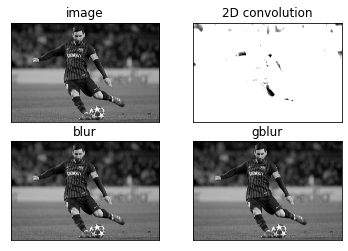

In [45]:

#img=cv2.cv2tColor(img,cv2.COLOR_BGR2RGB)

kernal=np.ones((25,25),np.float32)/25  #1/height*width
dat=cv2.filter2D(img,-1,kernal)#image,depth of output image,kernal
blur=cv2.blur(img,(5,5))#image,kernel size
gblur=cv2.GaussianBlur(img,(5,5),0)#image,kernel size,sigmaX
titles=['image','2D convolution','blur','gblur']
images=[img,dat,blur,gblur]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show()

## Edge Detection

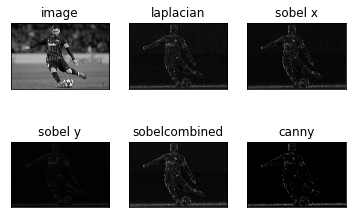

In [46]:
lap=cv2.Laplacian(img,cv2.CV_64F,ksize=3)
lap=np.uint8(np.absolute(lap))

sobelx=cv2.Sobel(img,cv2.CV_64F,1,0)#horizontal and vertical derivaties
soby=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)
canny=cv2.Canny(img,100,200)
sobelx=np.uint8(np.absolute(sobelx))
soby=np.uint8(np.absolute(soby))
sobelcombined=cv2.bitwise_or(sobelx,soby)
titles=['image','laplacian','sobel x','sobel y','sobelcombined','canny']
images=[img,lap,sobelx,soby,sobelcombined,canny]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show()